In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
from imutils import paths
from matplotlib import pyplot as plt

In [2]:
def detect_circle(image_file):
    # load the image, clone it for output, and then convert it to grayscale
    image = cv2.imread(image_file,cv2.IMREAD_COLOR)
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur using 3 * 3 kernel.
    gray = cv2.blur(gray, (3, 3))
    gray = cv2.GaussianBlur(gray, (7,7), 0)

    # detect circles in the image
#     circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
    circles = cv2.HoughCircles(gray,
                           cv2.HOUGH_GRADIENT,
                           minDist=120,
                           dp=1,
                           param1=80,
                           param2=30,
                           minRadius=100,
                           maxRadius=200)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(gray, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(gray, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        plt.imshow(gray)

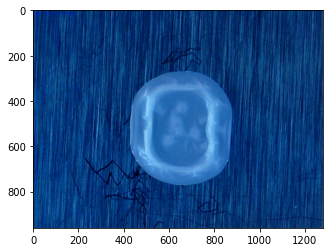

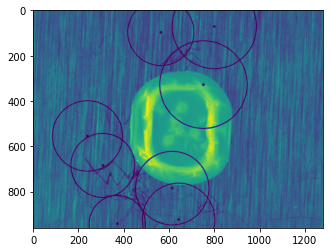

In [3]:
detect_circle('../data/raw/dn/DBM_80B_13Jan_DN.jpg')


In [4]:
def detect_circles_v2(file_name):
    img = cv2.imread(file_name)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

    minDist = 100
    param1 = 30 #500
    param2 = 50 #200 #smaller value-> more false circles
    minRadius = 5
    maxRadius = 100 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

    # Show result for testing:
    # cv2.imshow('img', img)
    plt.imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

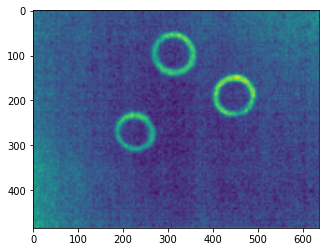

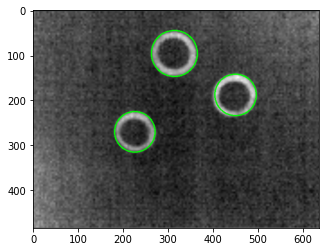

In [5]:
detect_circles_v2('circle.png')

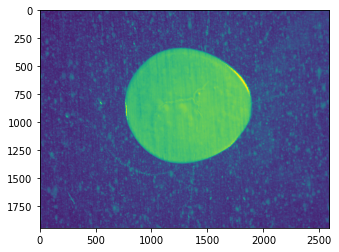

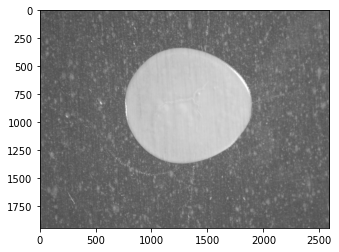

In [7]:
detect_circles_v2('../data/raw/pc/220208b_C1.bmp')